# Alucar - Analisando as vendas

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('dados/alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print(f'Quantidade de linhas e colunas {alucar.shape}')

Quantidade de linhas e colunas (24, 2)


In [5]:
print(f'Quantidade de dados nulos {alucar.isna().sum().sum()}')

Quantidade de dados nulos 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar.mes)

In [8]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [10]:
sns.__version__

'0.10.1'

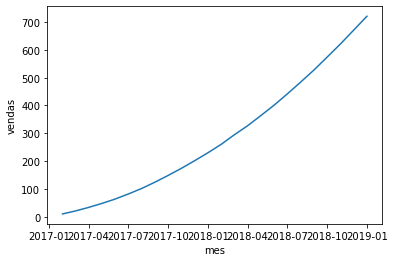

In [11]:
sns.lineplot(x='mes', y='vendas', data=alucar)

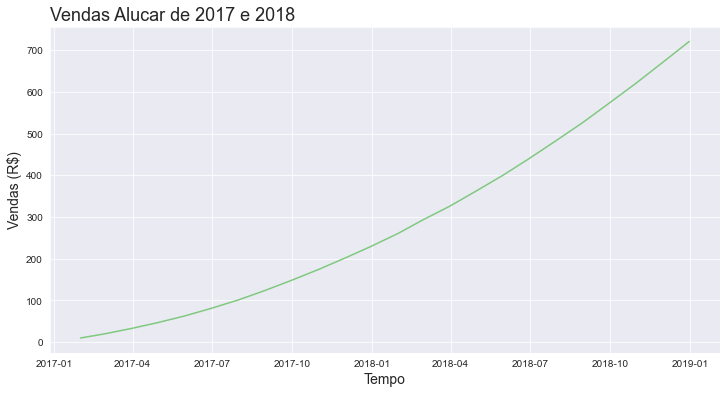

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [13]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [14]:
alucar['aumento'] = alucar['vendas'].diff()

In [15]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


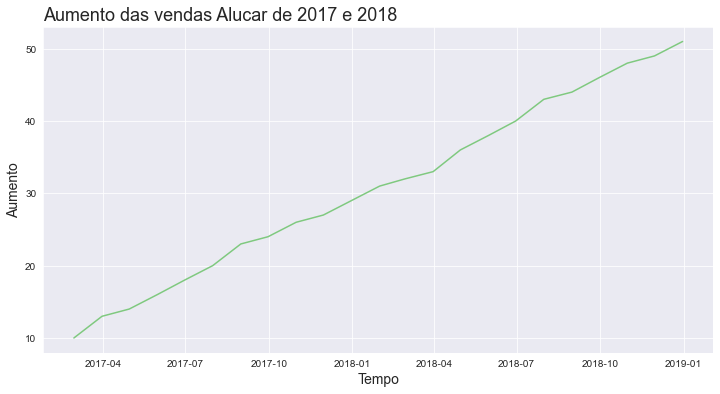

In [17]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [18]:
def plotar(titulo, labex, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=alucar)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labex, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

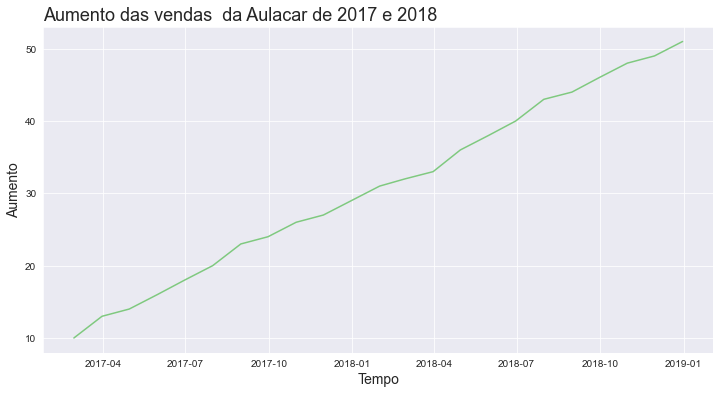

In [19]:
plotar('Aumento das vendas  da Aulacar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [20]:
alucar['aceleracao'] = alucar.aumento.diff()

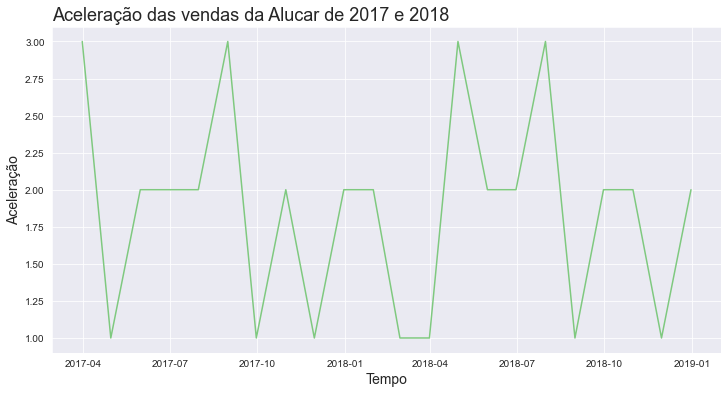

In [21]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

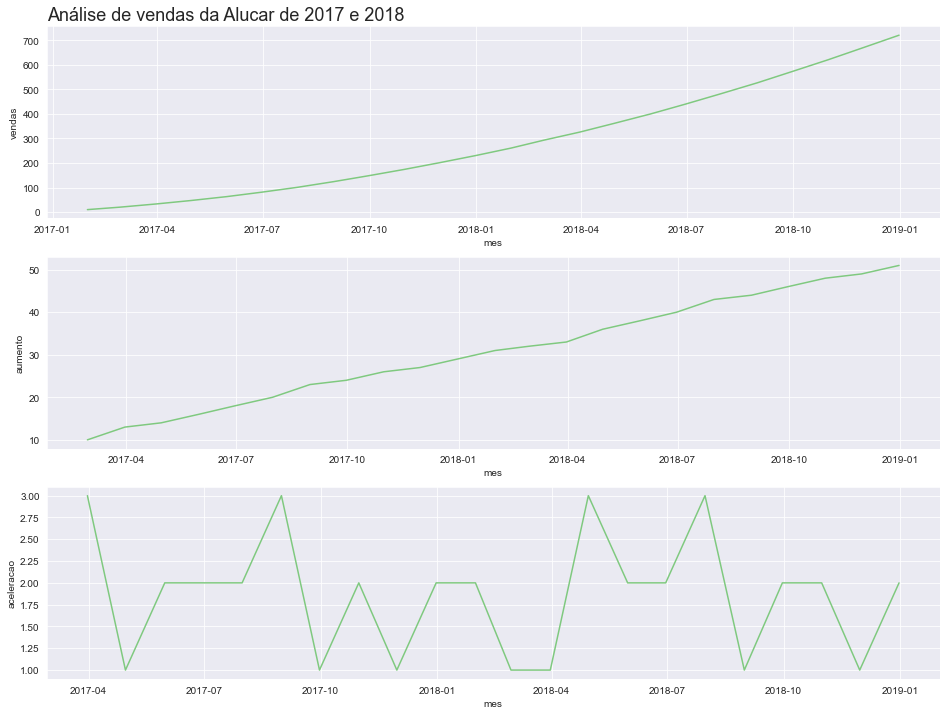

In [31]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [43]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

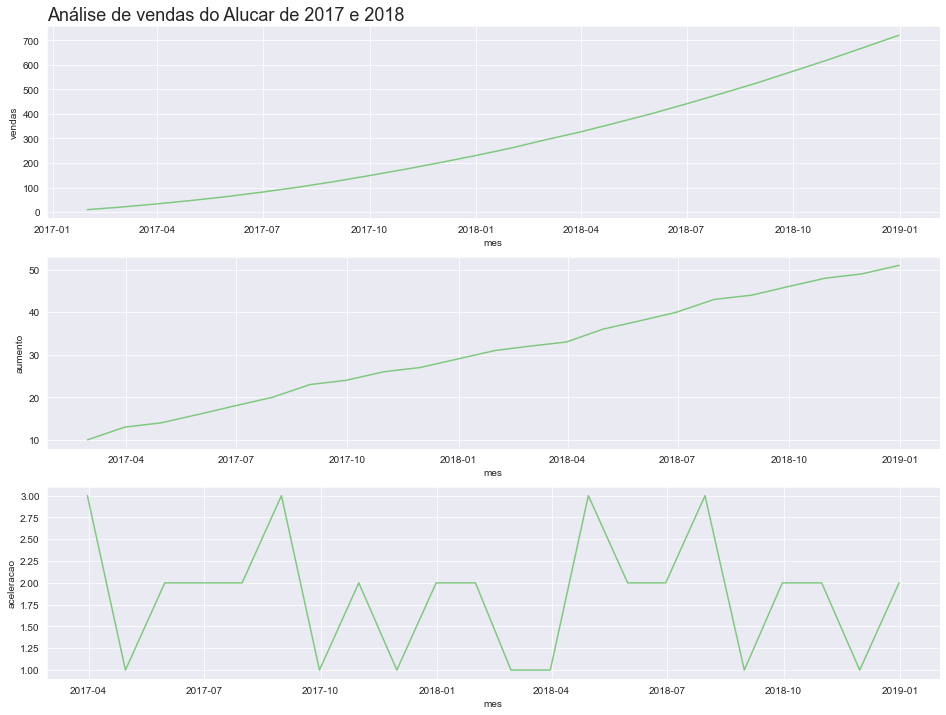

In [44]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de vendas do Alucar de 2017 e 2018')

In [45]:
from pandas.plotting import autocorrelation_plot

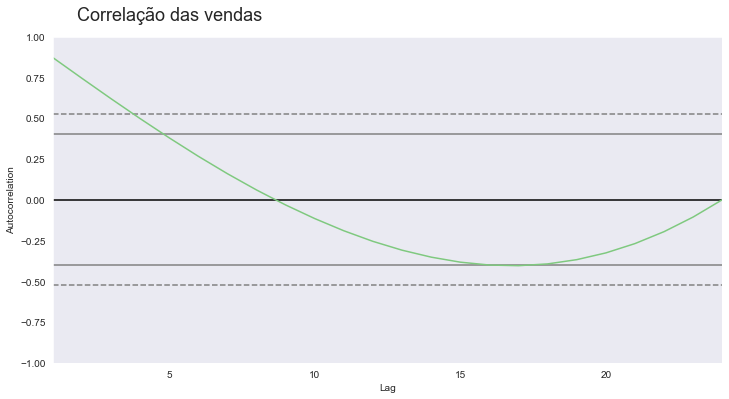

In [48]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.vendas)
ax = ax

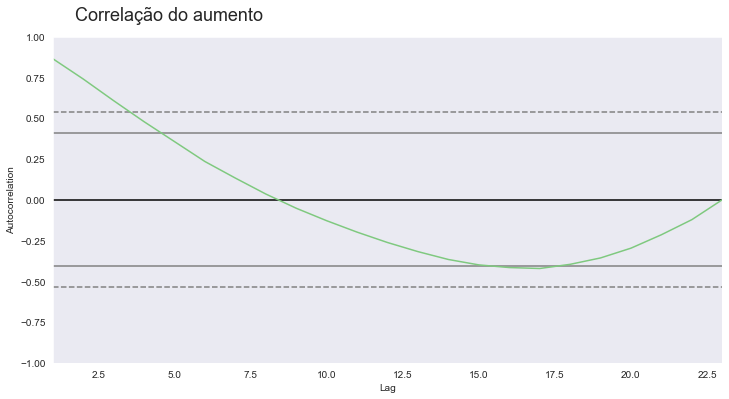

In [49]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.aumento[1:])
ax = ax

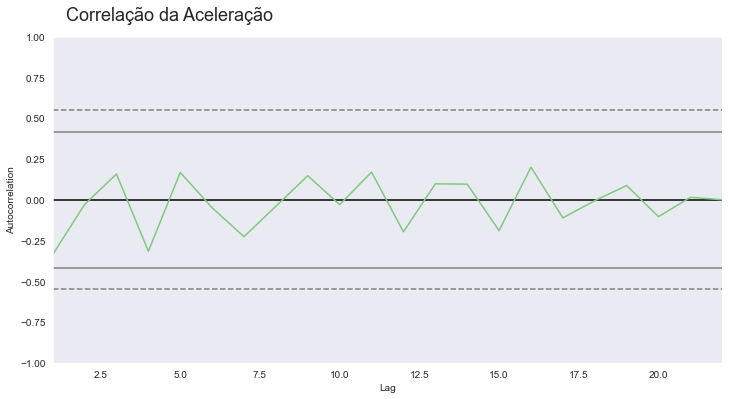

In [50]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.aceleracao[2:])
ax = ax

 # Alucar - Análise assinantes da newslatter

In [52]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')

In [53]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [55]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [58]:
print('Quantidade de linhas e colunas: ', assinantes.shape)
print('Quantidade de dados nulos: ', assinantes.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [59]:
assinantes.mes = pd.to_datetime(assinantes.mes)

In [61]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [63]:
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()

In [64]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


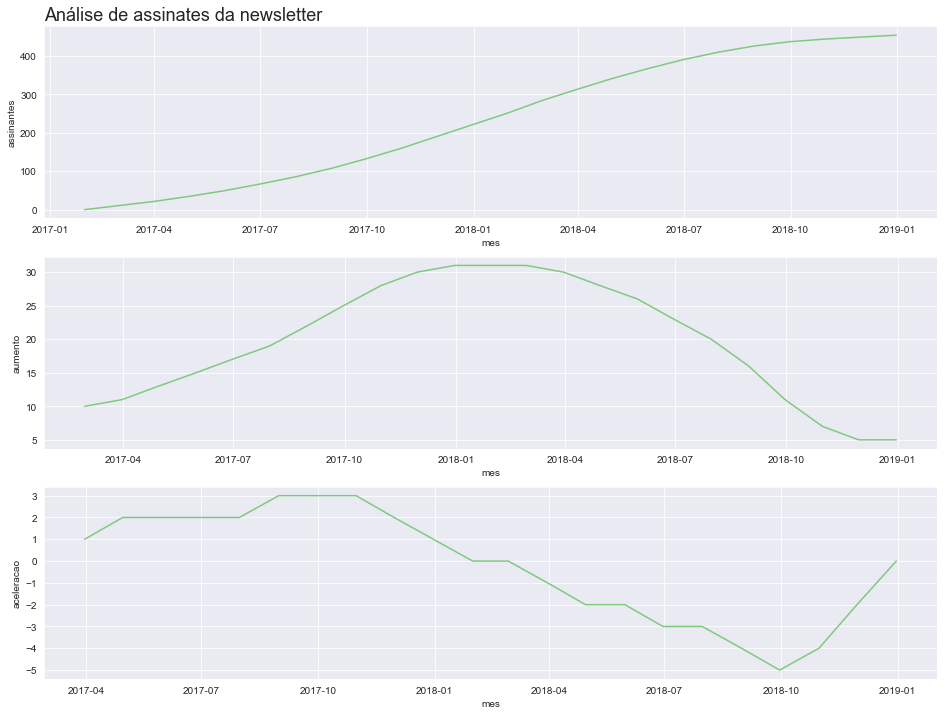

In [67]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinates da newsletter')

# Chocolura - Analisando as vendas

In [68]:
chocolura = pd.read_csv('dados/chocolura.csv')

In [69]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [70]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [71]:
chocolura.mes = pd.to_datetime(chocolura.mes)

In [72]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [73]:
print('Quantidade de linhas: ', chocolura.shape)
print('Quantidade de dados lunos: ', chocolura.isna().sum().sum())

Quantidade de linhas:  (24, 2)
Quantidade de dados lunos:  0


In [75]:
chocolura['aumento'] = chocolura.vendas.diff()
chocolura['aceleracao'] = chocolura.aumento.diff()

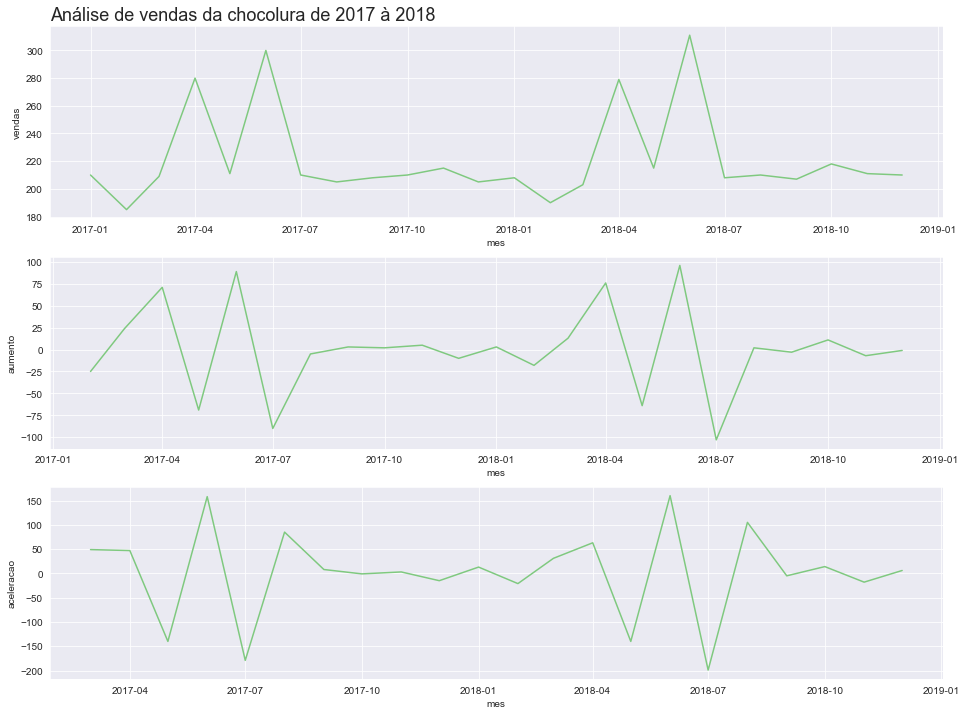

In [76]:
plot_comparacao('mes','vendas','aumento','aceleracao', chocolura, 'Análise de vendas da chocolura de 2017 à 2018')

# Chocolura - Vendas diárias (Outubro e Novembro)

In [77]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')

In [78]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [79]:
print('Quantidade de linhas: ', vendas_por_dia.shape)
print('Quantidade de dados lunos: ', vendas_por_dia.isna().sum().sum())

Quantidade de linhas:  (61, 2)
Quantidade de dados lunos:  0


In [80]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [81]:
vendas_por_dia.dia = pd.to_datetime(vendas_por_dia.dia)

In [82]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [83]:
vendas_por_dia['aumento'] = vendas_por_dia.vendas.diff()
vendas_por_dia['aceleracao'] = vendas_por_dia.aumento.diff()

In [84]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


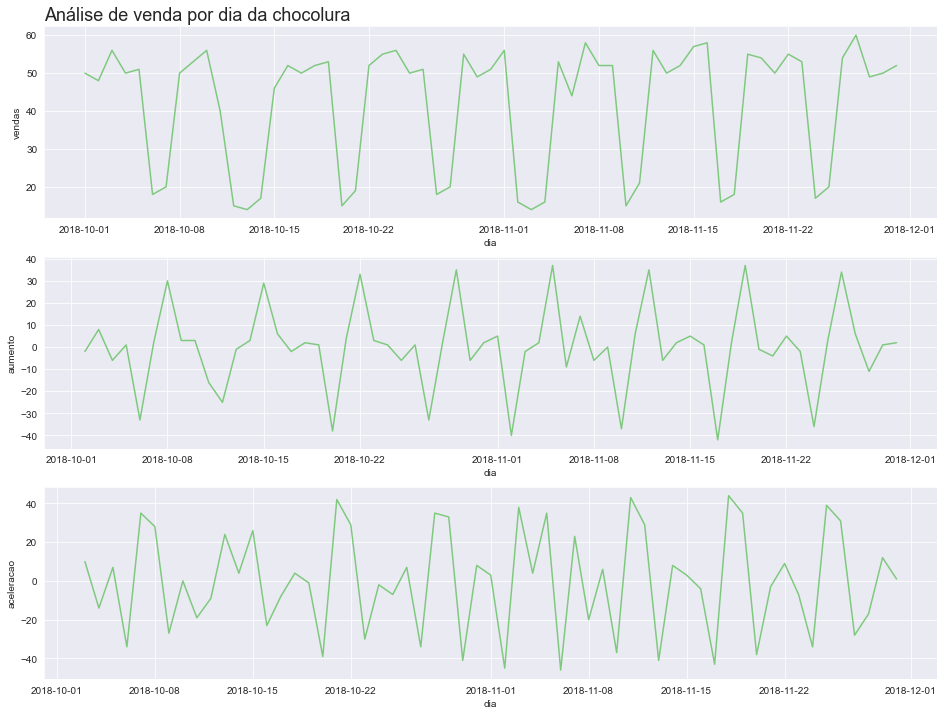

In [85]:
plot_comparacao('dia','vendas','aumento','aceleracao',vendas_por_dia,'Análise de venda por dia da chocolura')

 **Analisando a sazonalidade**

In [96]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [98]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [100]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [101]:
dias_traduzidos = {'Monday' : 'Segunda', 'Tuesday' : 'Terca', 'Wednesday' : 'Quarta',
                   'Thursday' : 'Quinta', 'Friday' : 'Sexta', 'Saturday' : 'Sabado',
       'Sunday' : 'Domingo'}

In [102]:
vendas_por_dia.dia_da_semana = vendas_por_dia.dia_da_semana.map(dias_traduzidos)

In [103]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [104]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os dias**

In [109]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas','aumento','aceleracao']].mean().round()

In [114]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0
